## Linear Regression using SK-Learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Height_and_Weight.csv')

In [3]:
df.head()

,Height,Weight
0,10,50
1,20,70
2,30,90
3,40,110
4,50,130


In [4]:
df.tail()

,Height,Weight
28,54,235
29,28,231
30,35,123
31,119,34
32,47,127


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  33 non-null     int64
 1   Weight  33 non-null     int64
dtypes: int64(2)
memory usage: 656.0 bytes


In [6]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [7]:
df.shape

(33, 2)

In [8]:
df.size

66

In [9]:
df.columns

Index(['Height', 'Weight'], dtype='object')

Text(0, 0.5, 'Height')

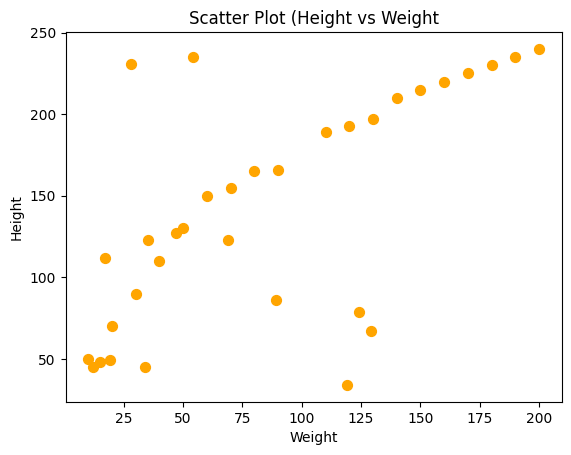

In [10]:
## Scatter PLot

plt.scatter(df['Height'], df['Weight'], color = 'Orange', s=50)
plt.title("Scatter Plot (Height vs Weight")
plt.xlabel("Weight")
plt.ylabel("Height")

In [11]:
## Correlation

df.corr()

,Height,Weight
Height,1.000000,0.639749
Weight,0.639749,1.000000


C:\Users\Deepak Yadav\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


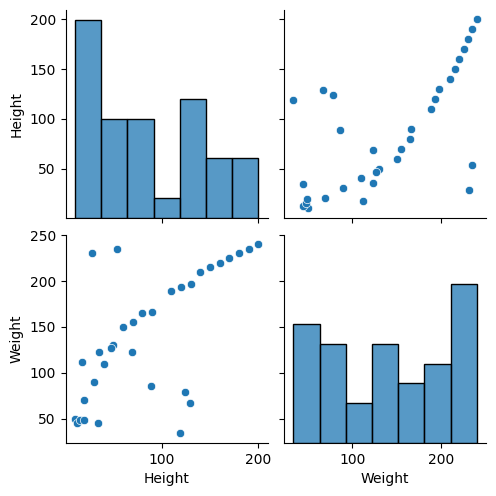

In [12]:
## Seaborn for Visualization
import seaborn as sns
sns.pairplot(df)

In [13]:
# Independent and Dependent Features
df.head()

,Height,Weight
0,10,50
1,20,70
2,30,90
3,40,110
4,50,130


In [14]:
X=df[['Weight']] ## independent features should be dataframe or 2 dimensions
y=df['Height'] ## Dependent Features , can be in series or 1D

In [15]:
np.array(X).shape

(33, 1)

In [16]:
np.array(y).shape

(33,)

In [17]:
X_series=df['Weight']
np.array(X_series
        ).shape
X_series.head()

0     50
1     70
2     90
3    110
4    130
Name: Weight, dtype: int64

In [18]:
## Train Test Split
"""
We do the train_test_split for following reason:-
I. To check Overfitting and Underfitting of model
II. To examine the accuracy
III. Train data will be only used for the training purpose
IV. Test Data will be used for checking how the model is performing for new datapoints
"""

from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
"""
If you don't put random_state (any value) for every executing value gets changing everybody,
gets different different values.
In this case the modle is randomly taking 25% of data and putting it into train set and test set,
if you won't specify the random state it will keep changing with any records of 25 %
"""

"\nIf you don't put random_state (any value) for every executing value gets changing everybody,\ngets different different values.\nIn this case the modle is randomly taking 25% of data and putting it into train set and test set,\nif you won't specify the random state it will keep changing with any records of 25 %\n"

In [20]:
X_train.shape 

(24, 1)

In [21]:
# 14 rows and 1 feature , 2D 

In [22]:
X_test.shape

(9, 1)

In [23]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler() #initialize
X_train = scaler.fit_transform(X_train)

In [25]:
X_test=scaler.transform(X_test)

In [26]:
X_test

array([[-1.53883539],
       [ 1.29524312],
       [-0.21824383],
       [ 1.4436242 ],
       [ 0.41979479],
       [ 0.76107126],
       [-1.37561621],
       [-0.38146301],
       [ 1.07267151]])

In [27]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [28]:
regression=LinearRegression()

In [29]:
regression.fit(X_train, y_train)

LinearRegression()

In [30]:
print("Coefficient or Slope : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient or Slope :  [33.88688841]
Intercept :  78.08333333333333


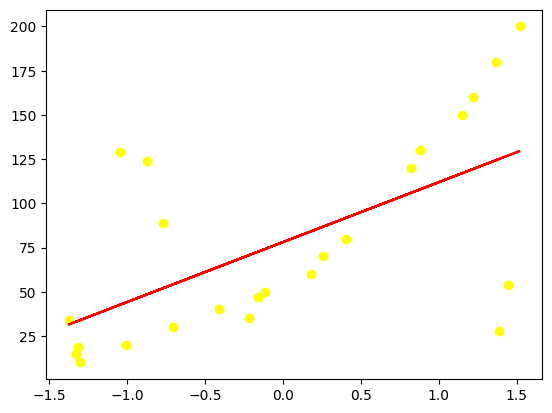

In [31]:
## Plot "Best_fit_line" w.r.t Trining Data
plt.scatter(X_train, y_train, color = 'yellow')
plt.plot(X_train,regression.predict(X_train), color='Red')

In [32]:
## Prediction for Test data
y_pred = regression.predict(X_test)

### Prediction for Test data (Calculation)
1. predicted height output = intercept +coef(Weights)
2. y_pred=-96.281+1.16(X_test)

In [33]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2037.0187880598978
2037.0187880598978
45.13334452552677


### R Square
Formula:
    R^2 = 1-(SSR/SST)
    R^2 = coefficient of determination SSR = sum of squares of residulas SST = total sum of squares

In [35]:
from sklearn.metrics import r2_score

In [36]:
score=r2_score(y_test, y_pred)
print(score)

0.40327326773071215


### Adjusted R^2
Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
where,

> R2 : The R2 of the model ,
> n : The number of observations ,
> k : The number of predictor variabloles

In [37]:
# display the adjusted R2
1- (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.31802659169224246

## OLS Linear Regression

In [ ]:
import statsmodels.api as sm

In [41]:
model=sm.OLS(y_train,X_train).fit()

In [42]:
prediction = model.predict(X_test)
print(prediction)

[-52.14634307  43.89175924  -7.3956043   48.91993213  14.22553915
  25.79033681 -46.61535289 -12.92659449  36.34949989]


In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.125
Model:                            OLS   Adj. R-squared (uncentered):              0.087
Method:                 Least Squares   F-statistic:                              3.277
Date:                Sun, 03 Sep 2023   Prob (F-statistic):                      0.0834
Time:                        14:54:24   Log-Likelihood:                         -141.99
No. Observations:                  24   AIC:                                      286.0
Df Residuals:                      23   BIC:                                      287.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Prediction of New Data

In [48]:
regression.predict(scaler.transform([[72]]))

C:\Users\Deepak Yadav\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([45.04404726])